In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pwd

'a:\\Учёба\\дпп'

# Изменения

- поменять ; на , в таблице csv потому что ; - не является привыйным разделением 

In [3]:
data = pd.read_csv('cardio_train\cardio_train.csv')

In [4]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# Предполагаем, что 'age' измеряется в днях
data['age'] = data['age'] / 365

# Вывод результата
print(data[['age']].head())


         age
0  50.391781
1  55.419178
2  51.663014
3  48.282192
4  47.873973


In [7]:
# Удаление строк, где ap_lo или ap_hi равны 0
data = data[(data['ap_lo'] != 0) & (data['ap_hi'] != 0)]


id - является бесполезной колонкой - удаляем 

In [8]:
data = data.drop('id', axis=1)

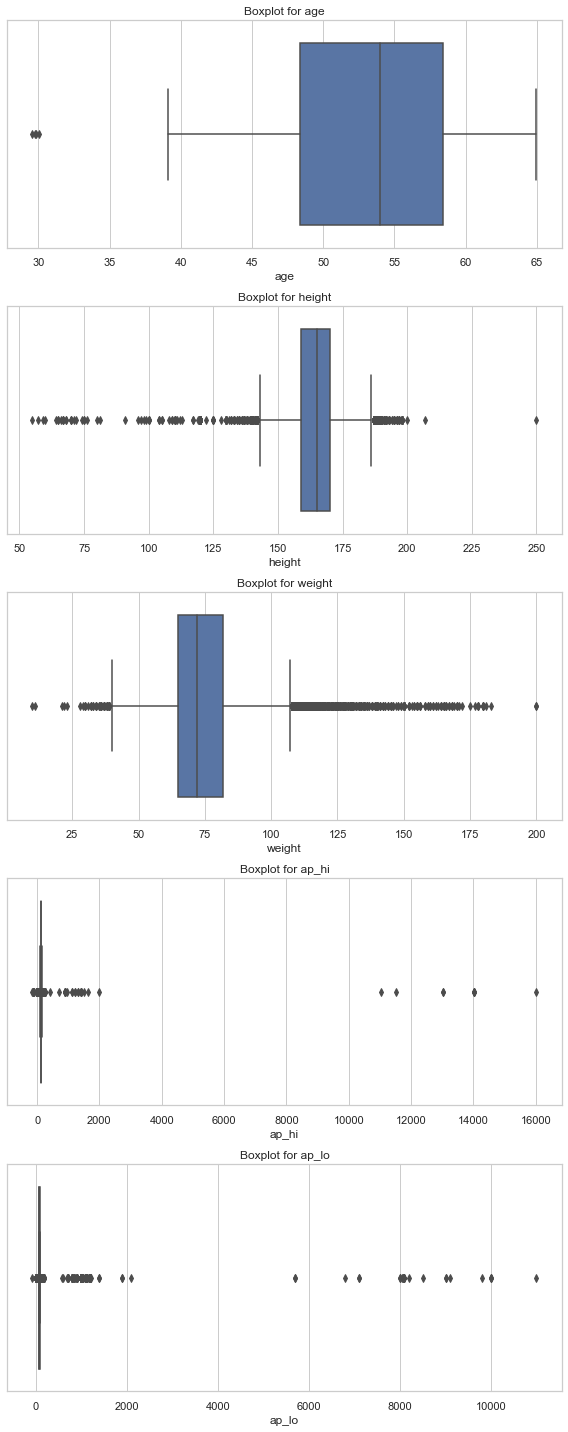

In [9]:
sns.set(style="whitegrid")

features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 4 * len(features)))

for i, feature in enumerate(features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()


In [10]:
data[data['height'] >= 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.136986,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.202740,2,207,78.0,100,70,1,1,0,1,1,0
41901,52.567123,2,200,100.0,170,1100,2,2,0,0,1,1


In [11]:
data = data[data['height'] <= 200]

In [12]:
X = data.drop('cardio', axis=1)
y = data['cardio']

# Вычисление межквартильного размаха (IQR) для 'ap_lo'
Q1_lo = X['ap_lo'].quantile(0.25)
Q3_lo = X['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo

# Определение границ для выявления выбросов
lower_bound_lo = Q1_lo - 1.5 * IQR_lo
upper_bound_lo = Q3_lo + 1.5 * IQR_lo

# Выбросы для 'ap_lo'
outliers_lo = ((X['ap_lo'] < lower_bound_lo) | (X['ap_lo'] > upper_bound_lo))

# Вычисление межквартильного размаха (IQR) для 'ap_hi'
Q1_hi = X['ap_hi'].quantile(0.25)
Q3_hi = X['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi

# Определение границ для выявления выбросов
lower_bound_hi = Q1_hi - 1.5 * IQR_hi
upper_bound_hi = Q3_hi + 1.5 * IQR_hi

# Выбросы для 'ap_hi'
outliers_hi = ((X['ap_hi'] < lower_bound_hi) | (X['ap_hi'] > upper_bound_hi))

# Количество выбросов
count_outliers_lo = outliers_lo.sum()
count_outliers_hi = outliers_hi.sum()

# Распределение cardio=0 и cardio=1 для 'ap_lo' и 'ap_hi'
distribution_lo_outliers = y[outliers_lo].value_counts().sort_index().to_frame(name='count').rename_axis('target').reset_index()
distribution_hi_outliers = y[outliers_hi].value_counts().sort_index().to_frame(name='count').rename_axis('target').reset_index()

# Вывод результатов
print(f"Количество выбросов для 'ap_lo': {count_outliers_lo}")
print(f"Количество выбросов для 'ap_hi': {count_outliers_hi}")
print("\nРаспределение cardio=0 и cardio=1 для 'ap_lo':")
print(distribution_lo_outliers)
print("\nРаспределение cardio=0 и cardio=1 для 'ap_hi':")
print(distribution_hi_outliers)


Количество выбросов для 'ap_lo': 4611
Количество выбросов для 'ap_hi': 1426

Распределение cardio=0 и cardio=1 для 'ap_lo':
   target  count
0       0   2470
1       1   2141

Распределение cardio=0 и cardio=1 для 'ap_hi':
   target  count
0       0    341
1       1   1085


In [13]:
data['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   117,   134,   166,
         210,   176,   116,    10,   121,    16,   112,   159,   113,
         118,   155,   142,   131,   157,   136,   146,   138,  -100,
         909,   109,    85,   106,   129,    93,     7,    95,   179,
         156,   168,   132,   104,   103,   178,   175,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,  -115,   111,   907,
          20,   188,   185,   163,   173,   154,   177,  -140,   174,
        -120, 14020,  1400,   240,   191,   197,  1620,   152,    96,
         199,  -150,

In [14]:
def preprocess_ap_hi(ap_hi):
    if ap_hi < 0:
        ap_hi = abs(ap_hi)
    if ap_hi > 9000:
        ap_hi /= 100
    elif ap_hi > 300:
        ap_hi /= 10
    elif 1<= ap_hi <= 2:
        ap_hi *= 100
    elif 3 <= ap_hi <= 25:
        ap_hi *= 10

    return ap_hi


data['ap_hi'] = data['ap_hi'].apply(preprocess_ap_hi)

data['ap_hi'].unique()

array([110. , 140. , 130. , 150. , 100. , 120. , 145. , 170. , 135. ,
       125. ,  90. , 180. , 160. , 133. , 190. ,  80. , 122. , 169. ,
       126. , 158. , 200. , 123. ,  70. , 161. , 147. , 115. , 137. ,
       153. , 148. , 105. , 220. , 119. , 141. , 165. , 164. , 124. ,
       172. ,  90.2, 162. , 117. , 134. , 166. , 210. , 176. , 116. ,
       121. , 112. , 159. , 113. , 118. , 155. , 142. , 131. , 157. ,
       136. , 146. , 138. ,  90.9, 109. ,  85. , 106. , 129. ,  93. ,
        95. , 179. , 156. , 168. , 132. , 104. , 103. , 178. , 175. ,
       128. , 151. , 139. , 127. , 108. , 144. , 102. , 143. ,  70.1,
       107. , 184. , 149. , 167. , 114. , 101. ,  60. , 181. , 171. ,
       202. , 111. ,  90.7, 188. , 185. , 163. , 173. , 154. , 177. ,
       174. , 140.2, 240. , 191. , 197. , 152. ,  96. , 199. , 193. ,
        99. , 196. ,  40.1, 160.2, 120.2,  90.6, 230. , 207. , 215. ,
        97. , 140.9, 110.2, 130.1, 195. , 120.5, 187. ])

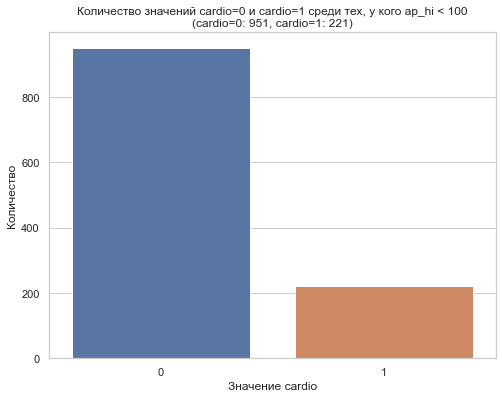

In [15]:
subset_data = data[data['ap_hi'] < 100]

count_cardio_0 = subset_data[subset_data['cardio'] == 0].shape[0]
count_cardio_1 = subset_data[subset_data['cardio'] == 1].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=subset_data)
plt.title(f'Количество значений cardio=0 и cardio=1 среди тех, у кого ap_hi < 100\n(cardio=0: {count_cardio_0}, cardio=1: {count_cardio_1})')
plt.xlabel('Значение cardio')
plt.ylabel('Количество')
plt.show()


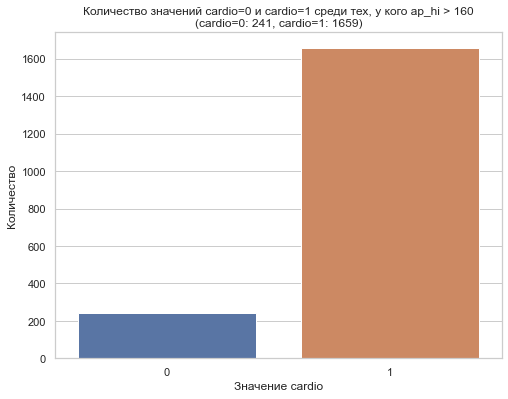

In [16]:
subset_data = data[data['ap_hi'] > 160]

count_cardio_0 = subset_data[subset_data['cardio'] == 0].shape[0]
count_cardio_1 = subset_data[subset_data['cardio'] == 1].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=subset_data)
plt.title(f'Количество значений cardio=0 и cardio=1 среди тех, у кого ap_hi > 160\n(cardio=0: {count_cardio_0}, cardio=1: {count_cardio_1})')
plt.xlabel('Значение cardio')
plt.ylabel('Количество')
plt.show()


In [17]:
data['ap_lo'].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,    93,   105, 10000,    99,    77,    59,  8044,
         140,    92,  1044,   108,   125,   115,    68,    61,   106,
         102,    94,    66,    52,   170,    76,   160,    62,    96,
         130,   113,    67,  9100,    10,    88,   902,     8,   112,
         104,    71,    72,  1008,    98,  2088,    20,   802,  8000,
        1022,   850,   708,    57,   101,  9011,  1011,    64,  1007,
        1177,  7100,    45,   709,  8500,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [18]:
def preprocess_ap_lo(ap_lo):
    if ap_lo < 0:
        ap_lo = abs(ap_lo)
    if ap_lo >= 1500:
        ap_lo /= 100
    elif 300 <= ap_lo <1500:
        ap_lo /= 10
    elif 2 <= ap_lo <= 15:
        ap_lo *= 10 
    elif ap_lo == 1:
        ap_lo *= 100

    return ap_lo
    
data['ap_lo'] = data['ap_lo'].apply(preprocess_ap_lo)



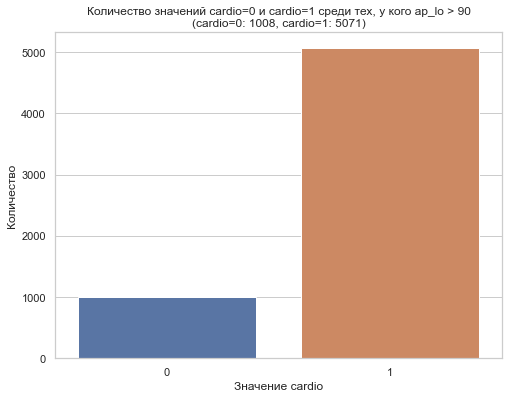

In [19]:
subset_data = data[data['ap_lo'] > 90]

count_cardio_0 = subset_data[subset_data['cardio'] == 0].shape[0]
count_cardio_1 = subset_data[subset_data['cardio'] == 1].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=subset_data)
plt.title(f'Количество значений cardio=0 и cardio=1 среди тех, у кого ap_lo > 90\n(cardio=0: {count_cardio_0}, cardio=1: {count_cardio_1})')
plt.xlabel('Значение cardio')
plt.ylabel('Количество')
plt.show()


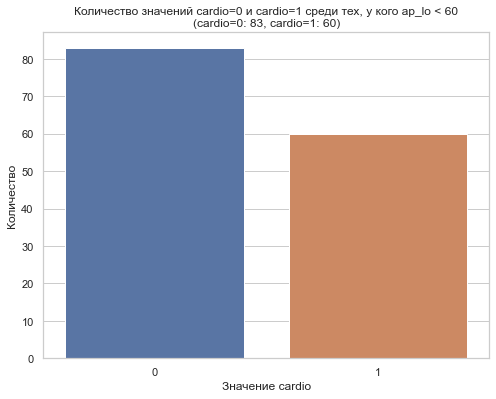

In [20]:
subset_data = data[data['ap_lo'] < 60]

count_cardio_0 = subset_data[subset_data['cardio'] == 0].shape[0]
count_cardio_1 = subset_data[subset_data['cardio'] == 1].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=subset_data)
plt.title(f'Количество значений cardio=0 и cardio=1 среди тех, у кого ap_lo < 60\n(cardio=0: {count_cardio_0}, cardio=1: {count_cardio_1})')
plt.xlabel('Значение cardio')
plt.ylabel('Количество')
plt.show()


In [21]:
def calculate_bmi(weight_kg, height_m):
    """
    Рассчитывает индекс массы тела (ИМТ).

    Параметры:
    - weight_kg: масса тела в килограммах
    - height_m: рост в метрах

    Возвращает:
    - ИМТ
    """
    bmi = weight_kg / (height_m ** 2)
    return bmi

# Применение функции для создания новой колонки 'bmi'
data['bmi'] = calculate_bmi(data['weight'], data['height'] / 100)

# Вывод первых нескольких строк с новой колонкой
print(data[['weight', 'height', 'bmi']].head())


   weight  height        bmi
0    62.0     168  21.967120
1    85.0     156  34.927679
2    64.0     165  23.507805
3    82.0     169  28.710479
4    56.0     156  23.011177


In [22]:
def round_age(age):
    """
    Округляет возраст до целого числа.
    
    Параметры:
    - age: float, возраст для округления
    
    Возвращает:
    - int, округленный возраст
    """
    rounded_age = round(age)
    return rounded_age

data['age'] = data['age'].apply(round_age)


In [23]:
data[data['age'] < 39]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
6219,30,1,175,59.0,120.0,80.0,1,1,0,0,1,0,19.265306
22343,30,2,175,92.0,100.0,60.0,1,1,0,0,1,0,30.040816
30666,30,1,159,59.0,120.0,80.0,1,1,0,0,1,0,23.337684
55905,30,1,160,59.0,110.0,70.0,1,1,0,0,1,0,23.046875


In [24]:
data = data[data['age'] >= 39] 

In [25]:
data = data[data['bmi'] < 60] 

In [26]:
data[data['height'] < 110] 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
17277,48,1,98,45.0,120.0,80.0,1,1,0,0,1,0,46.855477
29735,48,1,109,64.0,140.0,80.0,3,1,0,0,1,1,53.867520
41807,64,1,109,68.0,120.0,80.0,1,1,0,0,1,1,57.234240


In [27]:
data[data['ap_lo'] >= data['ap_hi']] 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
474,52,1,156,65.0,120.0,150.0,2,1,0,0,1,0,26.709402
636,56,2,169,68.0,70.0,110.0,1,1,0,0,1,0,23.808690
2384,64,1,154,102.0,90.0,150.0,1,1,0,0,0,1,43.008939
2990,60,2,182,90.0,80.0,140.0,3,3,0,0,1,1,27.170632
3447,55,2,180,80.0,80.0,125.0,3,3,1,1,1,1,24.691358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66315,62,1,169,88.0,100.0,160.0,3,3,0,0,0,1,30.811246
66657,53,2,160,81.0,80.0,120.0,3,3,1,1,1,1,31.640625
67421,64,1,153,74.0,80.0,130.0,1,1,0,0,1,1,31.611773
67470,58,2,172,57.0,80.0,120.0,1,1,1,0,1,1,19.267171


In [28]:
condition = data['ap_lo'] >= data['ap_hi']

temp_ap_lo = data.loc[condition, 'ap_lo']

data.loc[condition, 'ap_lo'] = data.loc[condition, 'ap_hi']
data.loc[condition, 'ap_hi'] = temp_ap_lo

In [29]:
X = data.drop('cardio', axis=1)
y = data['cardio']

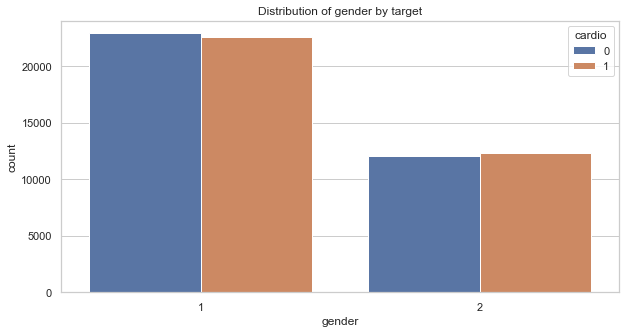

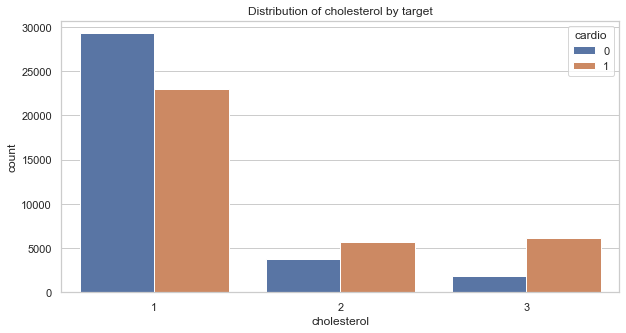

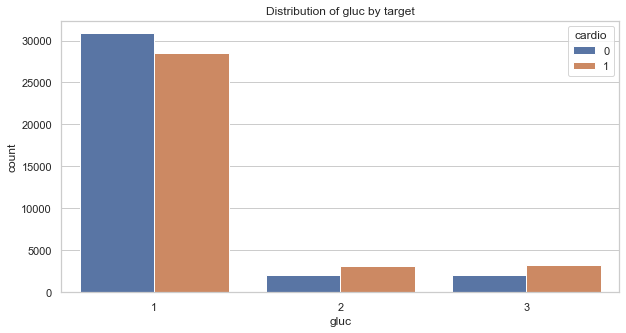

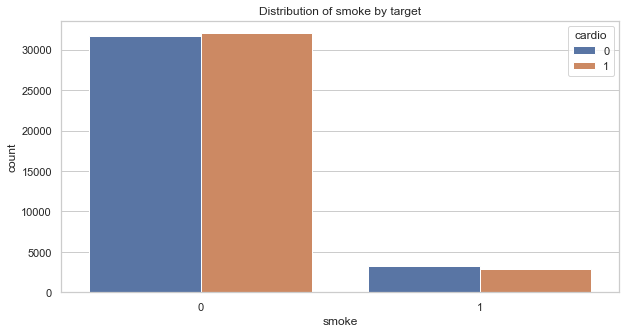

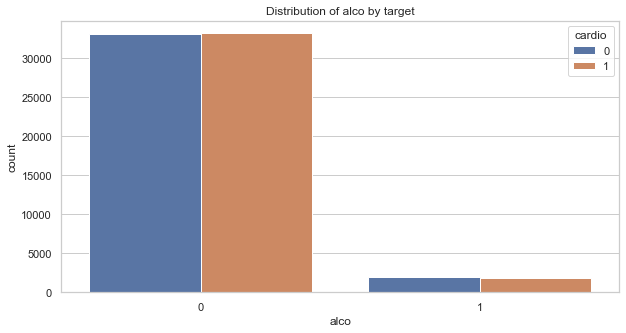

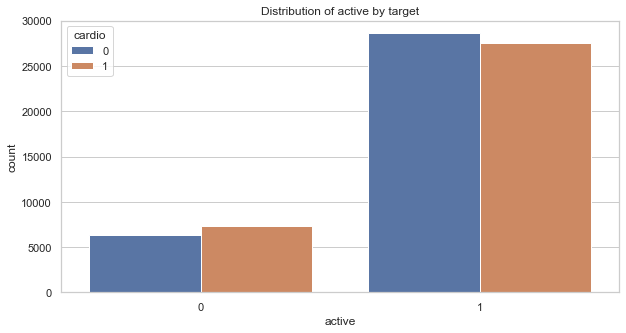

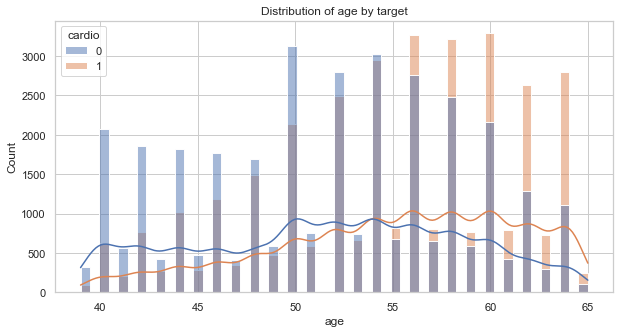

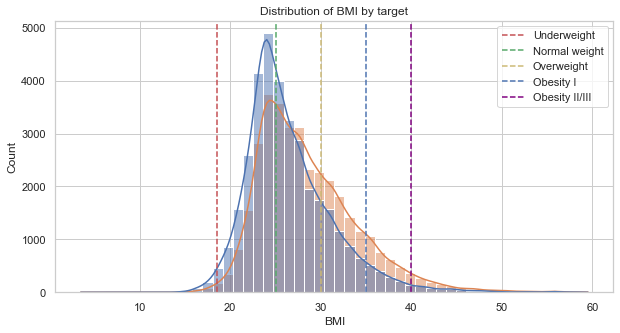

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([X, y], axis=1)

for categorical_feature in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=categorical_feature, hue='cardio', data=df)
    plt.title(f'Distribution of {categorical_feature} by target')
    plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(x='age', hue='cardio', data=df, kde=True)
plt.title(f'Distribution of age by target')
plt.show()


def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obesity I'
    elif 35 <= bmi < 40:
        return 'Obesity II'
    else:
        return 'Obesity III'


data['bmi_category'] = data['bmi'].apply(classify_bmi)

plt.figure(figsize=(10, 5))
sns.histplot(x='bmi', hue='cardio', data=data, kde=True, bins=50)
plt.axvline(x=18.5, color='r', linestyle='--', label='Underweight')
plt.axvline(x=25, color='g', linestyle='--', label='Normal weight')
plt.axvline(x=30, color='y', linestyle='--', label='Overweight')
plt.axvline(x=35, color='b', linestyle='--', label='Obesity I')
plt.axvline(x=40, color='purple', linestyle='--', label='Obesity II/III')
plt.title('Distribution of BMI by target')
plt.xlabel('BMI')
plt.legend()
plt.show()


In [31]:
data = data.drop(columns=['weight', 'height', 'bmi_category'])
X = data.drop('cardio', axis=1)
y = data['cardio']

In [32]:
X 

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50,2,110.0,80.0,1,1,0,0,1,21.967120
1,55,1,140.0,90.0,3,1,0,0,1,34.927679
2,52,1,130.0,70.0,3,1,0,0,0,23.507805
3,48,2,150.0,100.0,1,1,0,0,1,28.710479
4,48,1,100.0,60.0,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...
69995,53,2,120.0,80.0,1,1,1,0,1,26.927438
69996,62,1,140.0,90.0,2,2,0,0,1,50.472681
69997,52,2,180.0,90.0,3,1,0,1,0,31.353579
69998,61,1,135.0,80.0,1,2,0,0,0,27.099251


In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2857, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [34]:
print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])

49933 9986 9987


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создание и обучение модели случайного леса на тренировочных данных
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
classification_rep_train_rf = classification_report(y_train, y_train_pred_rf)

y_valid_pred_rf = rf_model.predict(X_valid)
accuracy_valid_rf = accuracy_score(y_valid, y_valid_pred_rf)
conf_matrix_valid_rf = confusion_matrix(y_valid, y_valid_pred_rf)
classification_rep_valid_rf = classification_report(y_valid, y_valid_pred_rf)

y_test_pred_rf = rf_model.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
classification_rep_test_rf = classification_report(y_test, y_test_pred_rf)

print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_train_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train_rf)
print("\nClassification Report:")
print(classification_rep_train_rf)

print("\nRandom Forest - Validation Set:")
print(f"Accuracy: {accuracy_valid_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_valid_rf)
print("\nClassification Report:")
print(classification_rep_valid_rf)

print("\nRandom Forest - Test Set:")
print(f"Accuracy: {accuracy_test_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_test_rf)
print("\nClassification Report:")
print(classification_rep_test_rf)


Random Forest - Training Set:
Accuracy: 0.9776

Confusion Matrix:
[[24619   368]
 [  751 24195]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24987
           1       0.99      0.97      0.98     24946

    accuracy                           0.98     49933
   macro avg       0.98      0.98      0.98     49933
weighted avg       0.98      0.98      0.98     49933


Random Forest - Validation Set:
Accuracy: 0.6861

Confusion Matrix:
[[3404 1664]
 [1471 3447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      5068
           1       0.67      0.70      0.69      4918

    accuracy                           0.69      9986
   macro avg       0.69      0.69      0.69      9986
weighted avg       0.69      0.69      0.69      9986


Random Forest - Test Set:
Accuracy: 0.6892

Confusion Matrix:
[[3334 1578]
 [1526 3549]]

Classification

In [36]:
X_train.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
55293,40,2,140.0,90.0,1,1,0,0,1,22.308150
47810,61,1,120.0,80.0,2,3,0,0,1,32.466181
65316,52,2,120.0,90.0,2,1,1,0,1,24.447279
12112,51,1,100.0,80.0,2,1,0,0,1,23.634033
52281,56,1,130.0,90.0,2,1,0,0,1,20.195092


#### Если число обусловленности данных(матрицы признаков) больше 100 ... 10000, то есть проблема мультиколлинеарности, которую надо решить

In [39]:
condition_number = np.linalg.cond(X_train[['age','ap_hi','ap_lo', 'bmi']])

print(f"Число обусловленности данных: {condition_number:.4f}")

Число обусловленности данных: 32.4349


In [488]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

depths_to_try = [2, 4, 6, 8, 10]

for depth in depths_to_try:
    catboost_model = CatBoostClassifier(random_seed=42, depth=depth, verbose=False, task_type="GPU")
    catboost_model.fit(X_train, y_train)

    y_valid_pred = catboost_model.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_valid_pred)

    y_train_pred_catboost = catboost_model.predict(X_train)
    accuracy_train_catboost = accuracy_score(y_train, y_train_pred_catboost)

    print(f"CatBoost Model with Depth {depth} Train Accuracy - {accuracy_train_catboost:.4f} - Validation Accuracy: {accuracy:.4f}")


    feature_importance = catboost_model.feature_importances_


    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    })
   
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print(feature_importance_df)


KeyboardInterrupt: 

In [496]:
depths_to_try = [2,4,6,8,10,12]
for depth in depths_to_try:
    catboost_model = CatBoostClassifier(iterations= 100, random_strength= 1, loss_function= 'Logloss', random_seed=42, depth=depth, verbose=False, task_type="GPU")
    catboost_model.fit(X_train, y_train)

    y_valid_pred = catboost_model.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_valid_pred)

    y_train_pred_catboost = catboost_model.predict(X_train)
    accuracy_train_catboost = accuracy_score(y_train, y_train_pred_catboost)

    print(f"CatBoost Model with Depth {depth} Train Accuracy - {accuracy_train_catboost:.4f} - Validation Accuracy: {accuracy:.4f}")


    feature_importance = catboost_model.feature_importances_


    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    })
   
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print(feature_importance_df)

CatBoost Model with Depth 2 Train Accuracy - 0.7369 - Validation Accuracy: 0.7374
       Feature  Importance
2        ap_hi   70.570638
0          age   12.749978
4  cholesterol    8.672090
3        ap_lo    2.942254
9          bmi    2.873889
8       active    0.809147
5         gluc    0.650412
6        smoke    0.382742
7         alco    0.305270
1       gender    0.043580
CatBoost Model with Depth 4 Train Accuracy - 0.7390 - Validation Accuracy: 0.7389
       Feature  Importance
2        ap_hi   45.253327
0          age   21.989508
4  cholesterol   14.173009
9          bmi    6.683397
3        ap_lo    5.210780
5         gluc    2.241316
8       active    1.767486
6        smoke    1.130190
7         alco    0.793418
1       gender    0.757569
CatBoost Model with Depth 6 Train Accuracy - 0.7431 - Validation Accuracy: 0.7400
       Feature  Importance
2        ap_hi   35.604180
0          age   21.276109
4  cholesterol   15.321318
9          bmi   10.366898
3        ap_lo    5.50978

In [497]:
y_test_pred_catboost = catboost_model.predict(X_test)
accuracy_test_catboost = accuracy_score(y_test, y_test_pred_catboost)

print(f"Test Accuracy - {accuracy_test_catboost:.4f} ")

Test Accuracy - 0.7313 


- маштаб данных
- глюкоза
- убрать выбросы


In [41]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)



y_valid_pred = model_lr.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)



print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)


Random Forest - Training Set:
Accuracy: 0.7330

Confusion Matrix:
[[3957 1111]
 [1555 3363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5068
           1       0.75      0.68      0.72      4918

    accuracy                           0.73      9986
   macro avg       0.73      0.73      0.73      9986
weighted avg       0.73      0.73      0.73      9986



a:\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Training Set:
Accuracy: 0.7280

Confusion Matrix:
[[4125  943]
 [1773 3145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      5068
           1       0.77      0.64      0.70      4918

    accuracy                           0.73      9986
   macro avg       0.73      0.73      0.73      9986
weighted avg       0.73      0.73      0.73      9986



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



model_svm = SVC()
model_svm.fit(X_train, y_train)


y_valid_pred = model_svm.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)



print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)


model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_valid_pred = model_rf.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)

print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)




model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_valid_pred = model_knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)

print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)



model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_valid_pred = model_xgb.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)

print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)

catboost_model = CatBoostClassifier(random_seed=42, verbose=False, task_type="GPU")
catboost_model.fit(X_train, y_train)


y_valid_pred = catboost_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_train = confusion_matrix(y_valid, y_valid_pred)
classification_rep_train = classification_report(y_valid, y_valid_pred)

print("Random Forest - Training Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)


Random Forest - Training Set:
Accuracy: 0.6826

Confusion Matrix:
[[3384 1684]
 [1486 3432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      5068
           1       0.67      0.70      0.68      4918

    accuracy                           0.68      9986
   macro avg       0.68      0.68      0.68      9986
weighted avg       0.68      0.68      0.68      9986

